## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.pkl"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [70]:
HAPPINESS_DATASET

'Data/happiness2020.pkl'

In [71]:
# Write your code here
happiness_df = pd.read_pickle(HAPPINESS_DATASET)
countries_df = pd.read_csv(COUNTRIES_DATASET)

In [72]:
happiness_df.head(5)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [73]:
countries_df.head(5)

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [74]:
countries_df['country_name'] = countries_df['country_name'].apply(lambda x: x.capitalize())

In [75]:
countries_df.head()

,country_name,area,population,literacy
0,Afghanistan,647500,31056997,"36,0"
1,Albania,28748,3581655,"86,5"
2,Algeria,2381740,32930091,"70,0"
3,Argentina,2766890,39921833,"97,1"
4,Armenia,29800,2976372,"98,6"


In [76]:
country_features = happiness_df.merge(countries_df, left_on='country', right_on='country_name')

In [77]:
country_features.head(10)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,Afghanistan,647500,31056997,"36,0"
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,Albania,28748,3581655,"86,5"
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,Algeria,2381740,32930091,"70,0"
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,Argentina,2766890,39921833,"97,1"
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,Armenia,29800,2976372,"98,6"
5,Australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,Australia,7686850,20264082,"100,0"
6,Austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,Austria,83870,8192880,"98,0"
7,Azerbaijan,5.1648,0.819308,65.508400,0.786824,-0.240255,0.552538,Commonwealth of Independent States,Azerbaijan,86600,7961619,"97,0"
8,Bahrain,6.2273,0.876342,68.500000,0.905856,0.133729,0.739347,Middle East and North Africa,Bahrain,665,698585,"89,1"
9,Bangladesh,4.8328,0.687293,64.503067,0.900625,-0.033665,0.661844,South Asia,Bangladesh,144000,147365352,"43,1"


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [78]:
# Write your code here
country_features.sort_values(by='happiness_score', ascending=False).head(10)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
33,Finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,Finland,338145,5231372,"100,0"
28,Denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,Denmark,43094,5450661,"100,0"
105,Switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,Switzerland,41290,7523934,"99,0"
45,Iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,Iceland,103000,299388,"99,9"
86,Norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,Norway,323802,4610820,"100,0"
82,Netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,Netherlands,41526,16491461,"99,0"
104,Sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,Sweden,449964,9016596,"99,0"
6,Austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,Austria,83870,8192880,"98,0"
67,Luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,Luxembourg,2586,474413,"100,0"
20,Canada,7.2321,0.927177,73.601601,0.933913,0.124771,0.390843,North America and ANZ,Canada,9984670,33098932,"97,0"


In [79]:
top_10 = country_features.sort_values(by='happiness_score', ascending=False)['country'][:10]

In [80]:
top_10

33         Finland
28         Denmark
105    Switzerland
45         Iceland
86          Norway
82     Netherlands
104         Sweden
6          Austria
67      Luxembourg
20          Canada
Name: country, dtype: object

We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [81]:
# Write your code here
grouped_happiness = country_features.groupby('world_region').agg( happiness_score=('happiness_score','mean'),\
                                             countries_count=('country','count')).sort_values(by='happiness_score', ascending=False)
grouped_happiness

,happiness_score,countries_count
world_region,,
North America and ANZ,7.227450,2
Western Europe,6.957032,19
Latin America and Caribbean,5.898041,17
Central and Eastern Europe,5.812969,13
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.079400,14
Sub-Saharan Africa,4.382559,29


The first region has only a few countries! What are them and what is their score?

In [82]:
grouped_happiness.index[0]

'North America and ANZ'

In [83]:
# Write your code here
country_features[country_features['world_region']==grouped_happiness.index[0]][['country','happiness_score']].sort_values(by='happiness_score', ascending=False)

,country,happiness_score
20,Canada,7.2321
5,Australia,7.2228


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [103]:
country_features.literacy.head()

0    36.0
1    86.5
2    70.0
3    97.1
4    98.6
Name: literacy, dtype: float64

In [99]:
country_features['literacy'] = country_features['literacy'].apply(lambda x: str(x).replace(",","."))

In [100]:
country_features['literacy'] = country_features['literacy'].astype(float)

In [102]:
# Write your code here
country_features[country_features['literacy'] == 100.0]

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
5,Australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,Australia,7686850,20264082,100.0
28,Denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,Denmark,43094,5450661,100.0
33,Finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,Finland,338145,5231372,100.0
67,Luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,Luxembourg,2586,474413,100.0
86,Norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,Norway,323802,4610820,100.0


What is the global average?

In [105]:
# Write your code here
country_features['literacy'].describe()

count    120.000000
mean      81.975000
std       20.176183
min       17.600000
25%       69.775000
50%       90.900000
75%       98.400000
max      100.000000
Name: literacy, dtype: float64

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [117]:
country_features = country_features.set_index(['country'])

In [121]:
country_features['literate'] = country_features['literacy'].apply(lambda x: 1 if x > 50 else 0)

In [124]:
country_features[['literacy','literate']].head()

,literacy,literate
country,,
Afghanistan,36.0,0
Albania,86.5,1
Algeria,70.0,1
Argentina,97.1,1
Armenia,98.6,1


In [139]:
# Write your code here
s = country_features.literate.value_counts(normalize=True,sort=False).mul(100)
s.index.name, s.name = 'cluster','percentage'
s = s.to_frame().reset_index()
s.cluster = s.cluster.map(lambda x: 'Below 50%' if x == 0 else 'above 50%')
s = s.set_index('cluster')
s['percentage'] = s['percentage'].apply(lambda x: "{:.2f}".format(x))
s

,percentage
cluster,
Below 50%,13.11
above 50%,86.89


Print the raw number and the percentage of world population that is illiterate.

In [152]:
world_population = country_features.population.sum()
df = country_features.groupby('literate').agg(population=('population',sum))
df['percentage'] = df.population.apply(lambda r: r/world_population).apply(lambda x: "{:.2f}".format(x))
df

,population,percentage
literate,,
0,568154726,0.10
1,5069933246,0.90


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [157]:
country_features.head(3)

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy,literate,population_density
country,,,,,,,,,,,,,
Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,Afghanistan,647500,31056997,36.0,0,47.964474
Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,Albania,28748,3581655,86.5,1,124.587971
Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,Algeria,2381740,32930091,70.0,1,13.826065


In [158]:
country_features['population_density'] = (country_features.population / country_features.area)
country_features[['happiness_score','population_density']]

,happiness_score,population_density
country,,
Afghanistan,2.5669,47.964474
Albania,4.8827,124.587971
Algeria,5.0051,13.826065
Argentina,5.9747,14.428413
Armenia,4.6768,99.878255
...,...,...
Venezuela,5.0532,28.211650
Vietnam,5.3535,256.108041
Yemen,3.5274,40.639029


What is the happiness score of the 3 countries with lowest population density?

In [161]:
country_features[['happiness_score','population_density']].sort_values(by='population_density')[:3]

,happiness_score,population_density
country,,
Mongolia,5.4562,1.810751
Australia,7.2228,2.636201
Botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty life expectancy (y).

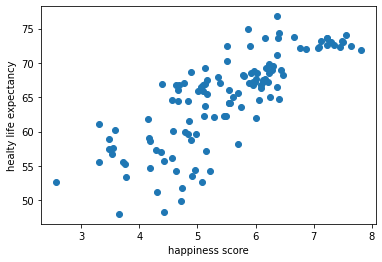

In [165]:
import matplotlib.pyplot as plt


#plot
x = country_features.happiness_score.values
y = country_features.healthy_life_expectancy.values
plt.scatter(x, y)
plt.xlabel('happiness score')
plt.ylabel('healty life expectancy')
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.